In [9]:
import numpy as np
import matplotlib.pyplot as plt


def gendata():
    l1 = [1] * 10000
    A1 = np.random.normal(2, 0.5, 10000)
    A2 = np.random.normal(2, 0.5, 10000)
    A = np.column_stack((A1, A2))
    l0 = [0] * 10000
    B1 = np.random.normal(0, 0.5, 10000)
    B2 = np.random.normal(0, 0.5, 10000)
    B = np.column_stack((B1, B2))
    X = np.vstack((A, B))
    Y = np.vstack((l1, l0))
    return X, Y


def adversial_samples(X, Y, model, epsilon=0.00001):
    dlt = model.predict(X).T - Y.reshape(X.shape[0], 1)
    print(model.weight.T)
    direction = np.sign(np.matmul(dlt, model.weight.T))
    return X + epsilon * direction, Y


def cost(Y_hat, Y):
    Y_hat = Y_hat.flatten()
    Y = Y.flatten()
    cost1 = 0
    elp = 0.0000000000000000000000000000000000000000000001
    for i in range(len(Y)):
        cost1 -= Y[i] * np.log(Y_hat[i] + elp) + (1 - Y[i]) * np.log(1 - Y_hat[i] + elp)
    return cost1


def error_rate(P, Y):
    return np.mean(Y != P)


class logistic_regression(object):
    def fit(self, X, Y, learning_rate=0.0000003, epoch=1000):
        X = np.array(X, dtype="float32")
        Y = np.array(Y, dtype="float32")
        #
        N, D = X.shape
        Y = Y.reshape(N, 1)
        #
        dlt = np.zeros([N, 1], dtype="float32")
        dW = np.zeros([1, D], dtype="float32")
        db = 0
        self.weight = np.zeros([D, 1], dtype="float32")
        self.beta = 0
        #
        c = []
        #
        for n in range(epoch):
            dlt = self.predict(X).T - Y
            dW = np.matmul(dlt.T, X).T
            db = dlt.sum() / N
            #
            self.weight -= learning_rate * dW
            self.beta -= learning_rate * db
            if n % 1000 == 0:
                c_new = cost(self.predict(X).T, Y)
                c.append(c_new)
                err = error_rate(self.predict_class(X).T, Y)
                print("epoch:", n, "cost:", c_new, "error rate:", err)
    #

    def predict(self, X):
        z = np.matmul(self.weight.T, X.T) + self.beta
        return 1 / (1 + np.exp(-z))
    #

    def predict_class(self, X):
        predictclass = self.predict(X)
        return (predictclass >= 0.5) * 1


X, Y = gendata()
model = logistic_regression()
model.fit(X, Y, learning_rate=0.0005, epoch=20000)

epoch: 0 cost: 16055.247187906756 error rate: 0.25145
epoch: 1000 cost: 7245.344958634809 error rate: 0.21895
epoch: 2000 cost: 6780.339619274892 error rate: 0.18895
epoch: 3000 cost: 6364.945414495366 error rate: 0.16345
epoch: 4000 cost: 5992.876464399244 error rate: 0.1408
epoch: 5000 cost: 5658.643049468595 error rate: 0.12405
epoch: 6000 cost: 5357.4799857355 error rate: 0.1094
epoch: 7000 cost: 5085.266848134652 error rate: 0.09595
epoch: 8000 cost: 4838.448238845235 error rate: 0.08535
epoch: 9000 cost: 4613.958528411248 error rate: 0.07635
epoch: 10000 cost: 4409.154219323052 error rate: 0.0684
epoch: 11000 cost: 4221.753548477395 error rate: 0.0617
epoch: 12000 cost: 4049.783692385317 error rate: 0.0561
epoch: 13000 cost: 3891.536374487742 error rate: 0.05115
epoch: 14000 cost: 3745.5276836997864 error rate: 0.0471
epoch: 15000 cost: 3610.4665244664534 error rate: 0.0434
epoch: 16000 cost: 3485.2267810108265 error rate: 0.0402
epoch: 17000 cost: 3368.8225324301106 error rate: 

In [8]:
print('Error Rate without adversarial examples:', error_rate(model.predict_class(X).T, Y.reshape(X.shape[0], 1)))
Xadv, Y = adversial_samples(X, Y, model, epsilon=0.2)
print(Xadv)
print('Error Rate with adversarial examples, epsilon = 0.2:', error_rate(model.predict_class(Xadv).T, Y.reshape(Xadv.shape[0], 1)))
Xadv2, Y = adversial_samples(X, Y, model, epsilon=0.5)
print('Error Rate with adversarial examples, epsilon = 0.5:', error_rate(model.predict_class(Xadv2).T, Y.reshape(Xadv2.shape[0], 1)))

Error Rate without adversarial examples: 0.02885
[[-0.03282982]
 [-0.01421474]
 [-0.0548714 ]
 ...
 [ 0.311054  ]
 [ 0.09007541]
 [ 0.32674461]]
[[1.3614911 1.3279928]]
[[ 1.44072176  1.77963711]
 [ 1.49749421  2.36610593]
 [ 0.74128855  2.09256308]
 ...
 [ 0.81007275  0.09000661]
 [-0.03226658 -0.18912193]
 [ 0.26385931  0.70440392]]
Error Rate with adversarial examples, epsilon = 0.2: 0.0803
[[-0.03282982]
 [-0.01421474]
 [-0.0548714 ]
 ...
 [ 0.311054  ]
 [ 0.09007541]
 [ 0.32674461]]
[[1.3614911 1.3279928]]
Error Rate with adversarial examples, epsilon = 0.5: 0.2216


Error Rate without adversarial examples: 0.0307
Error Rate with adversarial examples, epsilon = 0.2: 0.08105
Error Rate with adversarial examples, epsilon = 0.5: 0.22545


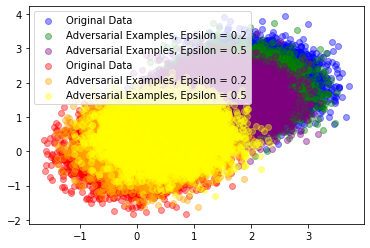

In [3]:
plt.scatter(X[:9999, 0], X[:9999, 1], color='blue', alpha=0.4, label='Original Data')
plt.scatter(Xadv[:9999, 0], Xadv[:9999, 1], color='green', alpha=0.4, label='Adversarial Examples, Epsilon = 0.2')
plt.scatter(Xadv2[:9999, 0], Xadv2[:9999, 1], color='purple', alpha=0.4, label='Adversarial Examples, Epsilon = 0.5')
plt.scatter(X[10000:, 0], X[10000:, 1], color='red', alpha=0.4, label='Original Data')
plt.scatter(Xadv[10000:, 0], Xadv[10000:, 1], color='orange', alpha=0.4, label='Adversarial Examples, Epsilon = 0.2')
plt.scatter(Xadv2[10000:, 0], Xadv2[10000:, 1], color='yellow', alpha=0.4, label='Adversarial Examples, Epsilon = 0.5')
plt.legend(loc='best')
plt.show()